In [40]:
import pandas as pd
import numpy as np

In [47]:
import seaborn as sns

In [3]:

bikes = pd.read_csv('london_merged.csv')

In [4]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
bikes.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
bikes.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [ ]:
"""
"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weathercode" - category of the weather
"isholiday" - boolean field - 1 holiday / 0 non holiday
"isweekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog
"""

In [16]:
cols = ['timestamp','count_of_shares','real temperature','feels like','humidity','wind-speed', 'weather-code','is_holiday','is_weekend','season']

In [17]:
bikes.columns = cols

In [18]:
bikes.columns

Index(['timestamp', 'count_of_shares', 'real temperature', 'feels like',
       'humidity', 'wind-speed', 'weather-code', 'is_holiday', 'is_weekend',
       'season'],
      dtype='object')

In [19]:
bikes.head()

,timestamp,count_of_shares,real temperature,feels like,humidity,wind-speed,weather-code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [27]:
# create 1 new feature and increase data by 20-30%
bikes['real temperature'].value_counts()

 13.000000    969
 12.000000    822
 9.000000     807
 14.000000    802
 11.000000    779
             ... 
 33.500000      3
 31.500000      3
 34.000000      2
 10.333333      1
-1.500000       1
Name: real temperature, Length: 73, dtype: int64

In [21]:
bikes.shape

(17414, 10)

In [46]:
bikes['humidity'].values.mean()

72.32495405995176

<AxesSubplot:>

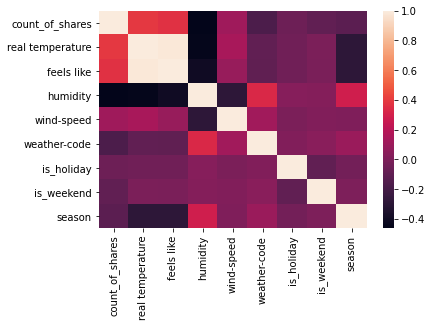

In [52]:
#  Lets find corellation between features and new feature based on it
sns.heatmap(bikes.iloc[:,1:].corr(),)
# corellations :
"""
humidity - count of shares,real temperature,feels like
seasomn-humidity

"""

In [83]:
# bikes.loc(bikes.iloc[:,1:].corr()>0.3)





In [87]:
bikes.iloc[:,1:].corr().sort_values(by = bikes['humidity'])

KeyError: 0         93.0
1         93.0
2         96.5
3        100.0
4         93.0
         ...  
17409     81.0
17410     81.0
17411     78.5
17412     76.0
17413     76.0
Name: humidity, Length: 17414, dtype: float64

In [99]:
bikes.corr()[bikes.corr()>0.3]

,count_of_shares,real temperature,feels like,humidity,wind-speed,weather-code,is_holiday,is_weekend,season
count_of_shares,1.000000,0.388798,0.369035,NaN,NaN,NaN,NaN,NaN,NaN
real temperature,0.388798,1.000000,0.988344,NaN,NaN,NaN,NaN,NaN,NaN
feels like,0.369035,0.988344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
humidity,NaN,NaN,NaN,1.00000,NaN,0.33475,NaN,NaN,NaN
wind-speed,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
weather-code,NaN,NaN,NaN,0.33475,NaN,1.00000,NaN,NaN,NaN
is_holiday,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
is_weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [104]:
bikes['weather-code'].value_counts()


# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog


1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather-code, dtype: int64

In [105]:
bikes['weather-code'].values 

array([3., 1., 1., ..., 4., 4., 2.])

In [111]:
# 
is_weekend = bikes[bikes['is_weekend'] == 1]['count_of_shares'].sum()

In [112]:
not_weekend = bikes[bikes['is_weekend'] == 0]['count_of_shares'].sum()

In [113]:
is_weekend> not_weekend

False

In [118]:
not_weekend,is_weekend

(15048216, 4857756)

In [176]:
# new feature 
bikes['time_of_day'] = list(map(lambda time: time[:][11:13],bikes['timestamp']))

In [177]:
bikes['timestamp'][11:]

11       2015-01-04 11:00:00
12       2015-01-04 12:00:00
13       2015-01-04 13:00:00
14       2015-01-04 14:00:00
15       2015-01-04 15:00:00
                ...         
17409    2017-01-03 19:00:00
17410    2017-01-03 20:00:00
17411    2017-01-03 21:00:00
17412    2017-01-03 22:00:00
17413    2017-01-03 23:00:00
Name: timestamp, Length: 17403, dtype: object

In [185]:
bikes['time_of_day'].values[:7]

array(['00', '01', '02', '03', '04', '05', '06'], dtype=object)

In [188]:
morning = ['morning' for i in bikes['time_of_day'] if int(i)<6]   

In [190]:
# morning

In [202]:
bikes['year'] = bikes['timestamp'].apply(lambda row:row[:4])
bikes['month'] = bikes['timestamp'].apply(lambda row:row.split('-')[1])
bikes['hour'] = bikes['timestamp'].apply(lambda row:row.split()[1].split(':')[0])
# bikes['timestamp'].apply(lambda row:row[:4])

In [203]:
bikes['year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
17409    2017
17410    2017
17411    2017
17412    2017
17413    2017
Name: year, Length: 17414, dtype: object